In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data using Pandas

In [2]:
ds = pd.read_csv('titanic_train.csv')

# View Data

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# There are 12 columns, Dependent variable is Survived column
# There are null values in Age,Cabin,Embarked Column

In [5]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
ds[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Check the missing data using heatmap

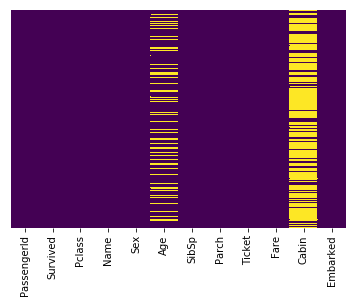

In [7]:
sns.heatmap(ds.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='viridis')

##### Let check how many people survived

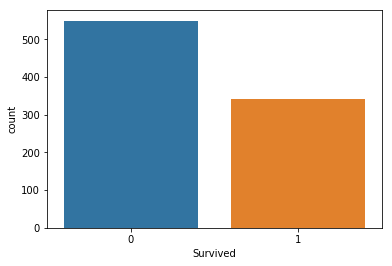

In [8]:
sns.countplot(x=ds['Survived'])

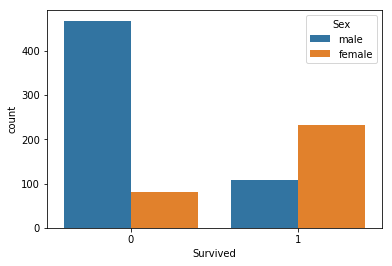

In [9]:
sns.countplot(x=ds['Survived'],hue=ds['Sex'])

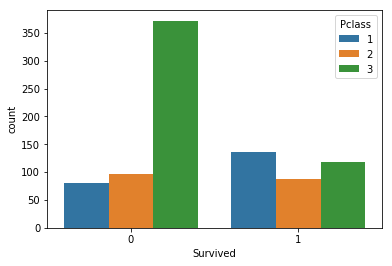

In [10]:
sns.countplot(x='Survived',data=ds,hue='Pclass')

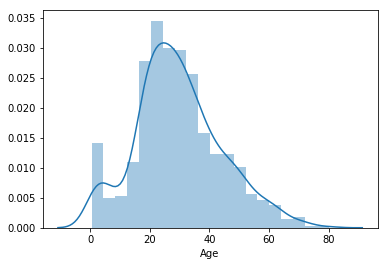

In [11]:
sns.distplot(ds['Age'].dropna())

# Fill the missing value for Age

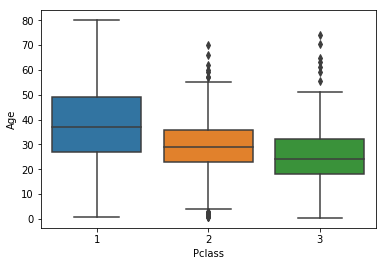

In [12]:
sns.boxplot(x='Pclass',y='Age',data=ds)

In [13]:
#Find the mean age per Pclass

In [14]:
ds.groupby(by=['Pclass']).mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
ds.groupby(by=['Pclass','Sex']).mean()['Age']

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [16]:
def impute_age(cols):
    Age = cols[0]
    Sex = cols[1]
    Pclass = cols[2]
    
    if pd.isnull(Age):

        if Pclass == 1 and Sex == 'female':
            return 35
        elif Pclass == 1 and Sex == 'male':
            return 41

        elif Pclass == 2 and Sex == 'female':
            return 29
        elif Pclass == 2 and Sex == 'male':
            return 31

        elif Pclass == 3 and Sex == 'female':
            return 22
        elif Pclass == 3 and Sex == 'male':
            return 27

    else:
        return Age

In [17]:
def impute_age_2(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
ds['Age'] = ds[['Age','Sex','Pclass']].apply(impute_age,axis=1)

In [19]:
ds['Age'][:2]

0    22.0
1    38.0
Name: Age, dtype: float64

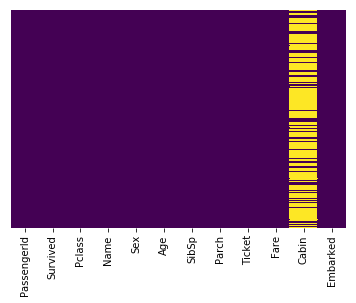

In [20]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
ds.drop('Cabin',axis=1,inplace=True)

In [22]:
ds[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [23]:
ds.shape

(891, 11)

In [24]:
ds.dropna(inplace=True)

In [25]:
ds.shape

(889, 11)

# Convert Categorical Features

In [26]:
sex = pd.get_dummies(ds['Sex'],drop_first=True)

In [27]:
sex[:2]

,male
0,1
1,0


In [28]:
embarked = pd.get_dummies(ds['Embarked'],drop_first=True)

In [29]:
embarked[:2]

,Q,S
0,0,1
1,0,0


In [30]:
#Drop Sex and Embarked column since we have created dummy variable
#Drop Name and Ticket number since there wont be much correlation in survival

In [31]:
ds.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
ds[:2]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833


In [33]:
ds = pd.concat([ds,sex,embarked],axis=1)

In [34]:
ds[:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
X = ds.iloc[:,2:10].values

In [36]:
X[:2]

array([[  3.    ,  22.    ,   1.    ,   0.    ,   7.25  ,   1.    ,
          0.    ,   1.    ],
       [  1.    ,  38.    ,   1.    ,   0.    ,  71.2833,   0.    ,
          0.    ,   0.    ]])

In [37]:
y = ds.iloc[:,1].values

In [38]:
y[:2]

array([0, 1], dtype=int64)

# Apply Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc_X = StandardScaler()

In [41]:
X_sc = sc_X.fit_transform(X)

In [42]:
X_sc[:2]

array([[ 0.82520863, -0.55498533,  0.43135024, -0.47432585, -0.50023975,
         0.73534203, -0.30794088,  0.61679395],
       [-1.57221121,  0.65536511,  0.43135024, -0.47432585,  0.78894661,
        -1.35991138, -0.30794088, -1.62128697]])

# Split Data into training set and test set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.25,random_state=0)

# 1. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
classifier_lr = LogisticRegression(random_state=0)

In [47]:
classifier_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred_lr = classifier_lr.predict(X_test)

### Analyze Prediction using confusion metrix and classification report

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
cm_lr = confusion_matrix(y_test,y_pred_lr)

In [51]:
cm_lr

array([[110,  22],
       [ 31,  60]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred_lr))

             precision    recall  f1-score   support

          0       0.78      0.83      0.81       132
          1       0.73      0.66      0.69        91

avg / total       0.76      0.76      0.76       223



In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y=y_train, cv=10)

In [55]:
accuracies_lr

array([ 0.82089552,  0.82089552,  0.91044776,  0.85074627,  0.79104478,
        0.82089552,  0.76119403,  0.77272727,  0.86363636,  0.84615385])

In [56]:
accuracies_lr.mean()

0.82586368855025571

In [57]:
accuracies_lr.std()

0.042313262397548443

# 2. KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
classifier_knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski');

In [60]:
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
y_pred_knn = classifier_knn.predict(X_test)

In [62]:
cm_knn = confusion_matrix(y_test,y_pred_knn)

In [63]:
cm_knn

array([[112,  20],
       [ 33,  58]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

          0       0.77      0.85      0.81       132
          1       0.74      0.64      0.69        91

avg / total       0.76      0.76      0.76       223



In [66]:
accuracies_knn = cross_val_score(estimator = classifier_knn, X = X_train, y=y_train, cv=10)

In [68]:
accuracies_knn

array([ 0.80597015,  0.80597015,  0.82089552,  0.8358209 ,  0.79104478,
        0.85074627,  0.80597015,  0.78787879,  0.84848485,  0.81538462])

In [69]:
accuracies_knn.mean()

0.81681661621960122

In [70]:
accuracies_knn.std()

0.02094868055799123

# 3. SVM

In [65]:
from sklearn.svm import SVC

In [71]:
classifiert_svm_linear = SVC(kernel='linear',random_state=0)

In [72]:
classifiert_svm_linear.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
y_pred_svm_linear = classifiert_svm_linear.predict(X_test)

In [74]:
cm_svm_linear = confusion_matrix(y_test,y_pred_svm_linear)

In [75]:
cm_svm_linear

array([[110,  22],
       [ 31,  60]], dtype=int64)

In [76]:
(110+60)/(110+22+31+60)

0.7623318385650224

In [78]:
print(classification_report(y_test,y_pred_svm_linear))

             precision    recall  f1-score   support

          0       0.78      0.83      0.81       132
          1       0.73      0.66      0.69        91

avg / total       0.76      0.76      0.76       223



In [83]:
accuracies_svm_linear = cross_val_score(estimator=classifiert_svm_linear,X=X_train,y=y_train,cv=10)

In [84]:
accuracies_svm_linear

array([ 0.7761194 ,  0.79104478,  0.89552239,  0.79104478,  0.71641791,
        0.85074627,  0.74626866,  0.71212121,  0.86363636,  0.83076923])

In [85]:
accuracies_svm_linear.mean()

0.79736909856312832

In [86]:
accuracies_svm_linear.std()

0.059121236121893038

# 3a. SVM - Poly

In [87]:
from sklearn.svm import SVC

In [88]:
classifier_svm_poly = SVC(kernel='poly', degree=3,random_state=0)

In [89]:
classifier_svm_poly.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
y_pred_svm_poly = classifier_svm_poly.predict(X_test)

In [91]:
cm_svm_poly = confusion_matrix(y_test,y_pred_svm_poly)

In [92]:
cm_svm_poly

array([[118,  14],
       [ 36,  55]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred_svm_poly))

             precision    recall  f1-score   support

          0       0.77      0.89      0.83       132
          1       0.80      0.60      0.69        91

avg / total       0.78      0.78      0.77       223



In [94]:
accuracies_svm_poly = cross_val_score(estimator=classifier_svm_poly,X=X_train,y=y_train,cv=10)

In [95]:
accuracies_svm_poly

array([ 0.8358209 ,  0.82089552,  0.86567164,  0.80597015,  0.80597015,
        0.86567164,  0.79104478,  0.8030303 ,  0.89393939,  0.86153846])

In [96]:
accuracies_svm_poly.mean()

0.83495529346275599

In [97]:
accuracies_svm_poly.std()

0.033013359704726214

# 4. Kernel SVM

In [98]:
from sklearn.svm import SVC

In [99]:
classifier_svm_kernel = SVC(kernel='rbf',random_state=0)

In [100]:
classifier_svm_kernel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
y_pred_svm_kernel = classifier_svm_kernel.predict(X_test)

In [103]:
cm_svm_kernel = confusion_matrix(y_test,y_pred_svm_kernel)

In [104]:
cm_svm_kernel

array([[118,  14],
       [ 35,  56]], dtype=int64)

In [135]:
print(classification_report(y_test,y_pred_svm_kernel))

             precision    recall  f1-score   support

          0       0.77      0.89      0.83       132
          1       0.80      0.62      0.70        91

avg / total       0.78      0.78      0.77       223



In [136]:
accuracies_svm_kernel = cross_val_score(estimator=classifier_svm_kernel,X=X_train,y=y_train,cv=10)

In [137]:
accuracies_svm_kernel

array([ 0.68656716,  0.71641791,  0.79104478,  0.74626866,  0.71641791,
        0.68656716,  0.71641791,  0.68181818,  0.75757576,  0.75384615])

In [138]:
accuracies_svm_kernel.mean()

0.72529415857774071

In [139]:
accuracies_svm_kernel.std()

0.034273131510050521

# Split training set and test set without feature scaling

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [140]:
X_train[:2]

array([[   1.    ,   31.    ,    0.    ,    2.    ,  164.8667,    0.    ,
           0.    ,    1.    ],
       [   2.    ,   39.    ,    0.    ,    0.    ,   26.    ,    1.    ,
           0.    ,    1.    ]])

# 5. Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
classifier_nb = GaussianNB()

In [143]:
classifier_nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [145]:
y_pred_nb = classifier_nb.predict(X_test)

In [146]:
cm_nb = confusion_matrix(y_test,y_pred_nb)

In [147]:
cm_nb

array([[104,  28],
       [ 28,  63]], dtype=int64)

In [148]:
print(classification_report(y_test,y_pred_nb))

             precision    recall  f1-score   support

          0       0.79      0.79      0.79       132
          1       0.69      0.69      0.69        91

avg / total       0.75      0.75      0.75       223



In [149]:
accuracies_nb = cross_val_score(estimator=classifier_nb,X=X_train,y=y_train,cv=10)

In [150]:
accuracies_nb

array([ 0.7761194 ,  0.82089552,  0.89552239,  0.80597015,  0.71641791,
        0.8358209 ,  0.74626866,  0.77272727,  0.84848485,  0.72307692])

In [151]:
accuracies_nb.mean()

0.7941303969662179

In [152]:
accuracies_nb.std()

0.054763540904934828

# 6. Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
classifier_dt = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [111]:
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [112]:
y_pred_dt = classifier_dt.predict(X_test)

In [113]:
cm_dt = confusion_matrix(y_test,y_pred_dt)

In [114]:
cm_dt

array([[107,  25],
       [ 29,  62]], dtype=int64)

In [115]:
print(classification_report(y_test,y_pred_dt))

             precision    recall  f1-score   support

          0       0.79      0.81      0.80       132
          1       0.71      0.68      0.70        91

avg / total       0.76      0.76      0.76       223



In [117]:
accuracies_dt = cross_val_score(estimator=classifier_dt,X=X_train,y=y_train,cv=10)

In [118]:
accuracies_dt

array([ 0.74626866,  0.80597015,  0.86567164,  0.82089552,  0.76119403,
        0.85074627,  0.73134328,  0.78787879,  0.86363636,  0.81538462])

In [120]:
accuracies_dt.mean()

0.8048989319138572

In [121]:
accuracies_dt.std()

0.045453405535095304

# 7. Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)

In [124]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [127]:
y_pred_rf = classifier_rf.predict(X_test)

In [128]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

In [129]:
cm_rf

array([[109,  23],
       [ 30,  61]], dtype=int64)

In [130]:
print(classification_report(y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.78      0.83      0.80       132
          1       0.73      0.67      0.70        91

avg / total       0.76      0.76      0.76       223



In [131]:
accuracies_rf = cross_val_score(estimator=classifier_rf,X=X_train,y=y_train,cv=10)

In [132]:
accuracies_rf

array([ 0.8358209 ,  0.79104478,  0.86567164,  0.80597015,  0.80597015,
        0.86567164,  0.7761194 ,  0.8030303 ,  0.92424242,  0.78461538])

In [133]:
accuracies_rf.mean()

0.82581567686045287

In [134]:
accuracies_rf.std()

0.044326050276155014